    Year  Temperature      Value
0   1961       -0.218  3662.2986
1   1962       -0.492  3767.9650
2   1963       -0.021  3779.9989
3   1964       -0.032  3848.9287
4   1965       -0.074  3744.2132
5   1966        0.297  3721.0964
6   1967       -0.204  3846.3328
7   1968       -0.220  3902.1631
8   1969        0.322  3977.5329
9   1970        0.059  3968.1794
10  1971       -0.470  3985.7142
11  1972        0.040  3872.7650
12  1973        0.296  4041.3654
13  1974        0.012  3999.4995
14  1975       -0.324  4167.0241
15  1976       -0.005  4065.2321
16  1977        0.152  4252.2321
17  1978       -0.169  4273.3019
18  1979        0.299  4160.5739
19  1980        0.391  4238.3928
20  1981        0.050  4297.1787
21  1982       -0.038  4038.9367
22  1983       -0.177  4353.7166
23  1984       -0.150  4344.7229
24  1985        0.153  4342.4428
25  1986        0.142  4345.5573
26  1987        0.542  4096.3935
27  1988        0.477  4405.6319
28  1989       -0.039  4451.1375
29  1990  

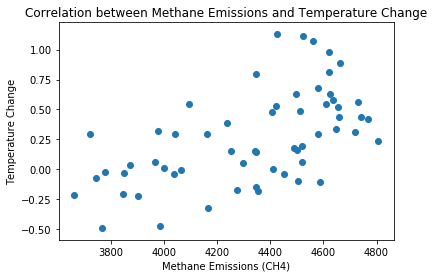

Predicted temperature change for the next 10 years:
Year 2020: 0.5940840415334456
Year 2021: 0.5948393828449392
Year 2022: 0.5955947241564328
Year 2023: 0.5963500654679263
Year 2024: 0.5971054067794195
Year 2025: 0.597860748090913
Year 2026: 0.5986160894024066
Year 2027: 0.5993714307139002
Year 2028: 0.6001267720253938
Year 2029: 0.6008821133368869
Mean Squared Error: 0.10553583028978906
R-squared Score: 0.2282265733914377


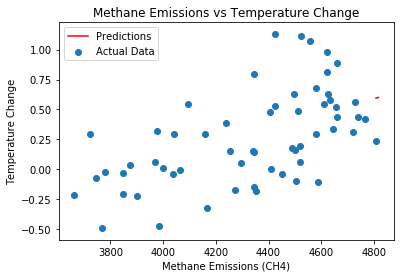

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Load temperature data into data frames
temp_df = pd.read_csv("E:\CSU Work\Thesis and RA\datasets_2\Annual_Surface_Temperature_Change.csv")

# Load methane emissions data for India into data frames
methane_df = pd.read_csv("E:\CSU Work\Thesis and RA\datasets_2\Emissions_Country_india.csv")

# Filter temperature data for Country India and drop the unnecessary columns
temp_df = temp_df[temp_df['Country'] == 'India']
temp_df = temp_df.drop(columns=['ObjectId','Country','ISO2','ISO3','Indicator','Code','Unit','Source'])

# Reset the index before transposing
temp_df.reset_index(drop=True, inplace=True)

# Transpose the DataFrame
transposed_temp_df = temp_df.transpose()

# Reset the index
transposed_temp_df.reset_index(inplace=True)

# Rename the columns
transposed_temp_df.columns = ['Year', 'Temperature']

# Convert 'Year' values to integers by Replacing F1961 with 1961
transposed_temp_df['Year'] = transposed_temp_df['Year'].str.replace('F', '').astype(int)

# Load only relevant methane emissions data for item as Rice Cultivation amd element as CH4
methane_df = methane_df[(methane_df['Item'] == 'Rice Cultivation') & (methane_df['Element'] == 'Emissions (CH4)')]
# Considering only the required Data
methane_df = methane_df[['Year', 'Value']]


# Merge temperature and methane emissions data on 'Year' column
combined_data = pd.merge(transposed_temp_df, methane_df, on='Year')
print(combined_data)

# Calculate correlation between methane emissions and temperature change
correlation = combined_data['Value'].corr(combined_data['Temperature'])
print("Correlation between Methane Emissions and Temperature Change:", correlation)

# Visualize correlation between methane Emission and temperature change
plt.scatter(combined_data['Value'], combined_data['Temperature'])
plt.title('Correlation between Methane Emissions and Temperature Change')
plt.xlabel('Methane Emissions (CH4)')
plt.ylabel('Temperature Change')
plt.show()

# Proceed with the Regression model as there is a correlation bw Methane Emission and Temperature change
# Split the data into training and testing sets
X = combined_data[['Value']].values
y = combined_data['Temperature'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict temperature change for the next 10 years
next_10_years_methane = np.arange(combined_data['Value'].max() + 1, combined_data['Value'].max() + 11).reshape(-1, 1)
next_10_years_temperature_change = regression_model.predict(next_10_years_methane)

# Print the predicted temperature change for the next 10 years
print("Predicted temperature change for the next 10 years:")
for i, year in enumerate(range(combined_data['Year'].max() + 1, combined_data['Year'].max() + 11)):
    print(f"Year {year}: {next_10_years_temperature_change[i]}")

# Calculate mean squared error
mse = mean_squared_error(y_test, regression_model.predict(X_test))
print("Mean Squared Error:", mse)

# Calculate R-squared score
r_squared = regression_model.score(X_test, y_test)
print("R-squared Score:", r_squared)


# Plot the dataset along with the predictions
plt.scatter(combined_data['Value'], combined_data['Temperature'], label='Actual Data')
plt.plot(next_10_years_methane, next_10_years_temperature_change, color='red', label='Predictions')
plt.title('Methane Emissions vs Temperature Change')
plt.xlabel('Methane Emissions (CH4)')
plt.ylabel('Temperature Change')
plt.legend()
plt.show()
